In [4]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade setuptools

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install catboost==1.0.3

In [1]:
#Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

## DATA COLLECTION

In [2]:
df = pd.read_csv('/Users/da_m1_36/Downloads/diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


## DATA CLEANING
CHECK for Nulls, duplicates, missing values, empty spaces

In [4]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [10]:
empty_spaces = df.applymap(lambda x: isinstance(x, str) and x.isspace()).sum()
print(empty_spaces)

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
Volume        0
dtype: int64


In [11]:
df.duplicated().sum()

0

## TABLE INFO

### 0- Fair, 1- Good, 2- Ideal, 3- Premium, 4- Very Good

In [12]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

### 0- D, 1- E, 2- F, 3- G, 4- H, 5- I, 6- J

In [13]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

### 0- I1, 1- IF, 2- SI1, 3- SI2, 4- VS1, 5- VS2, 6- VVS1, 7- VVS2

In [14]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [15]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z,Volume
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,129.849403
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,78.245262
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,65.136830
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,114.808572
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,170.842451
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,3840.598060


In [16]:
df["Volume"] = df["x"] * df["y"] * df["z"]
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Volume
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,140.766120


In [17]:
label_encoder = preprocessing.LabelEncoder()
df['cut'] = label_encoder.fit_transform(df['cut'])
df['color'] = label_encoder.fit_transform(df['color'])
df['clarity' ]= label_encoder.fit_transform(df['clarity'])

In [18]:
df.skew()

Unnamed: 0    0.000000
carat         1.116646
cut          -0.187443
color         0.189366
clarity       0.174917
depth        -0.082294
table         0.796896
price         1.618395
x             0.378676
y             2.434167
z             1.522423
Volume        3.038746
dtype: float64

<Axes: ylabel='Density'>

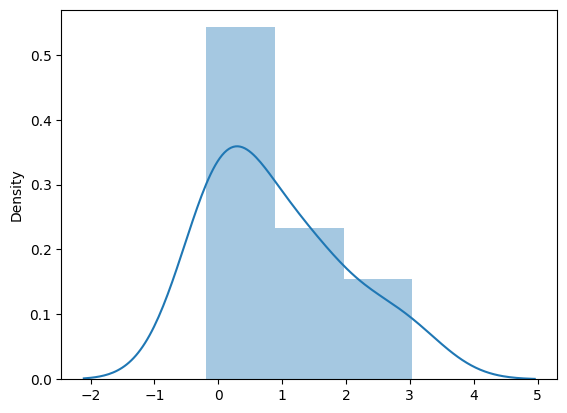

In [19]:
#skew gragh
sk = df.skew()
sns.distplot(sk)

In [27]:
df.kurtosis()
#log tranformation  - normalise outliers

Unnamed: 0    -1.200000
carat          1.256635
cut           -0.465953
color         -0.866762
clarity       -0.820874
depth          5.739415
table          2.801857
price          2.177696
x             -0.618161
y             91.214557
z             47.086619
Volume        94.864654
dtype: float64

<Axes: ylabel='Density'>

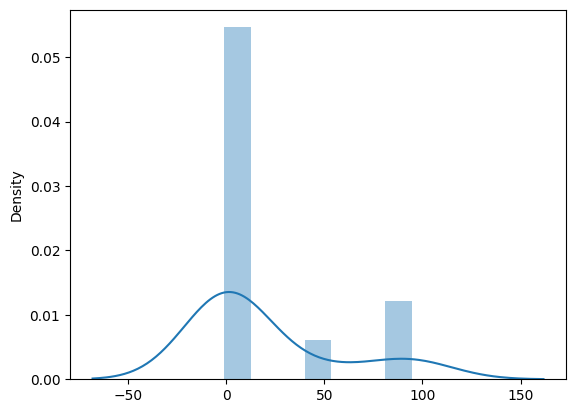

In [21]:
kt = df.kurtosis()
sns.distplot(kt)

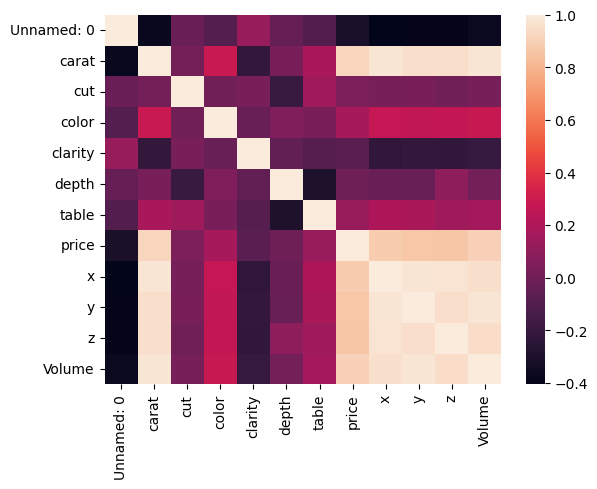

In [22]:
dataplot=sns.heatmap(df.corr())

<Axes: >

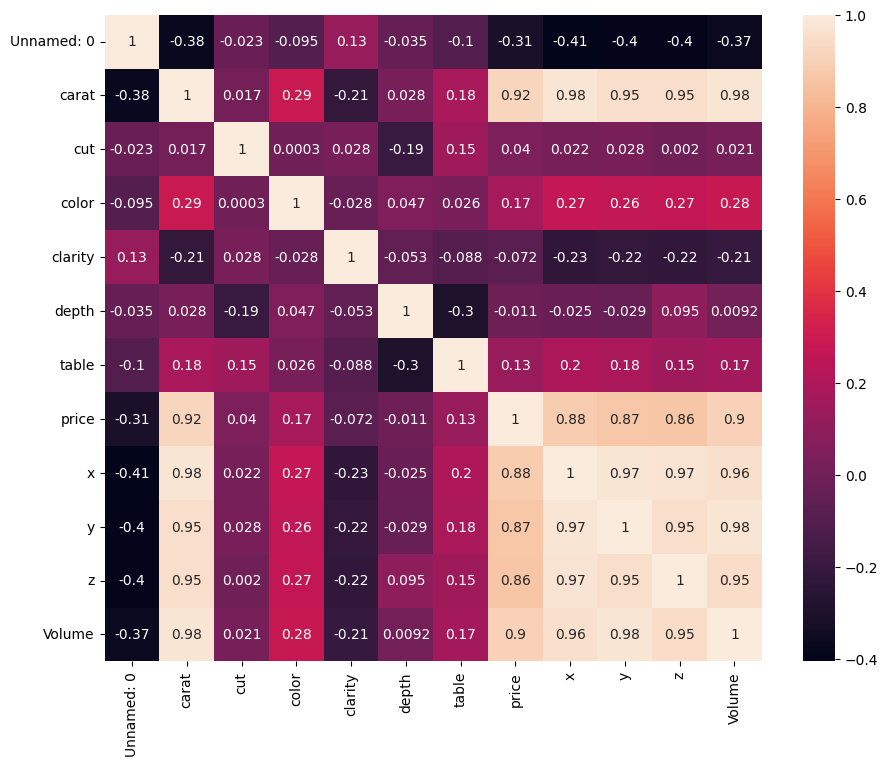

In [23]:
cor = df.corr()

plt.figure(figsize=(10.6, 8.4))  
sns.heatmap(cor, annot = True)

In [26]:
# VARIANCE THRESHOLD
from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0.5) #Removing both constant and quasi-constant
var_thr.fit(df)

var_thr.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True])

In [40]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Volume
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53936,53937,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53937,53938,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53938,53939,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74,140.766120


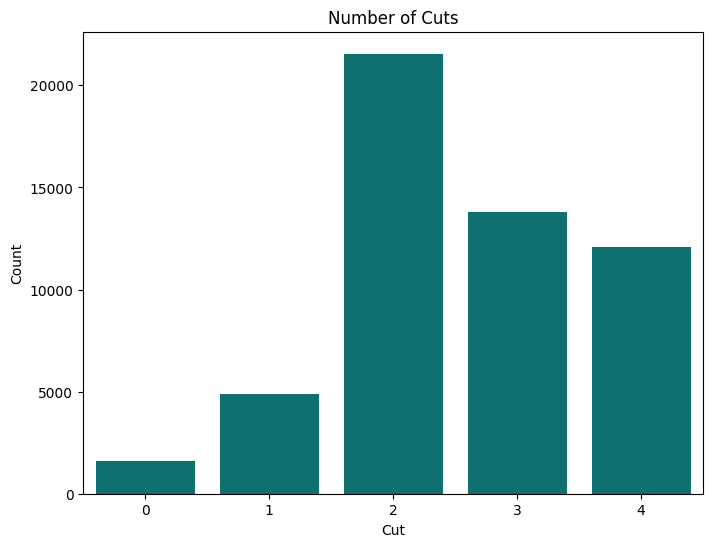

In [49]:
#Assuming 'df' is your diamonds dataset DataFrame
#Count the number of occurrences for each cut category
cut_counts = df['cut'].value_counts()

#Plot the count of cuts
plt.figure(figsize=(8, 6))
sns.barplot(x=cut_counts.index, y=cut_counts.values, color='teal')

#Set labels and title
plt.xlabel('Cut')
plt.ylabel('Count')
plt.title('Number of Cuts')

#Show the plot
plt.show()

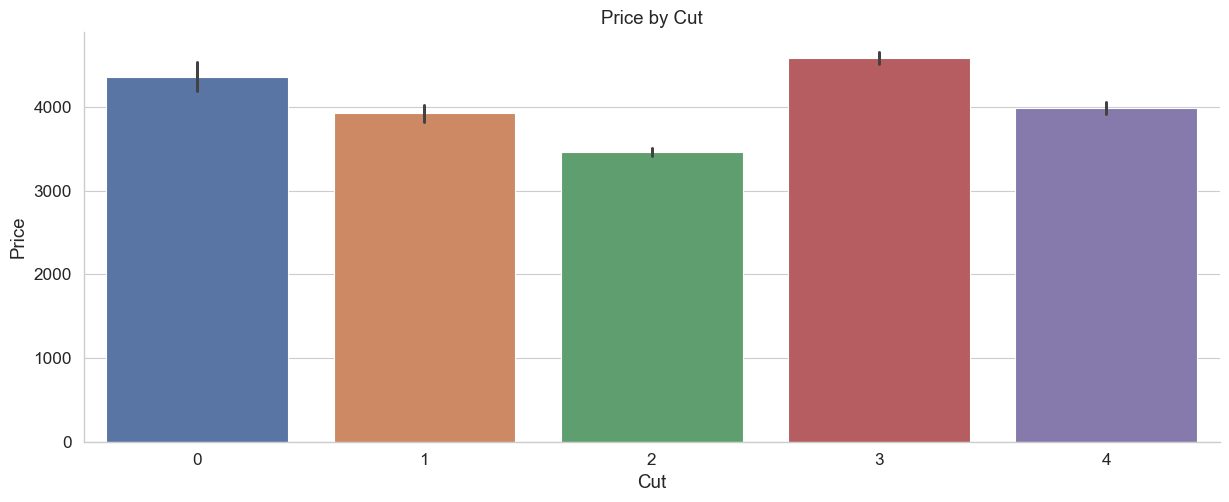

In [50]:
#Assuming 'df' is your diamonds dataset DataFrame
#Set the style and context for the plot
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.4)

#Create the bar graph
p = sns.catplot(x='cut', y='price', data=df, kind='bar', aspect=2.5)

#Set labels and title
plt.xlabel('Cut')
plt.ylabel('Price')
plt.title('Price by Cut')

#Show the plot
plt.show()